<h1>Question 1</h1>

In [1]:
# Importing the libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
# Intensity Transformation
c = np.array([(50, 50), (50, 100), (150, 255),(150, 150)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[1, 1], c[2, 1], c[2, 0]-c[1, 0]).astype('uint8')
t3 = np.linspace(c[3, 1], 255, 255-c[3, 0]).astype('uint8')
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

256


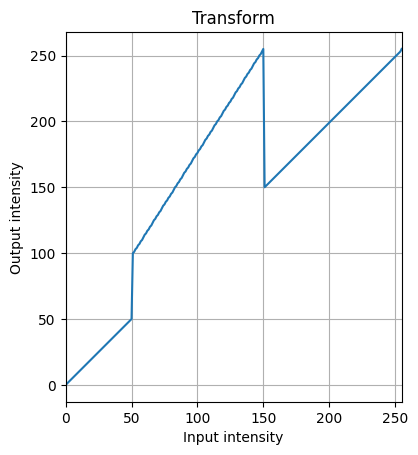

In [3]:
# Plotting the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title('Transform')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_aspect('equal')
ax.grid()
plt.show()

In [4]:
# Loading the Image
img_org = cv.imread('Images\emma.jpg', cv.IMREAD_GRAYSCALE)
if img_org is None: 
    assert False, 'Image could not be read'

In [5]:
# Applying the transformation
image_transformed = cv.LUT(img_org, transform)

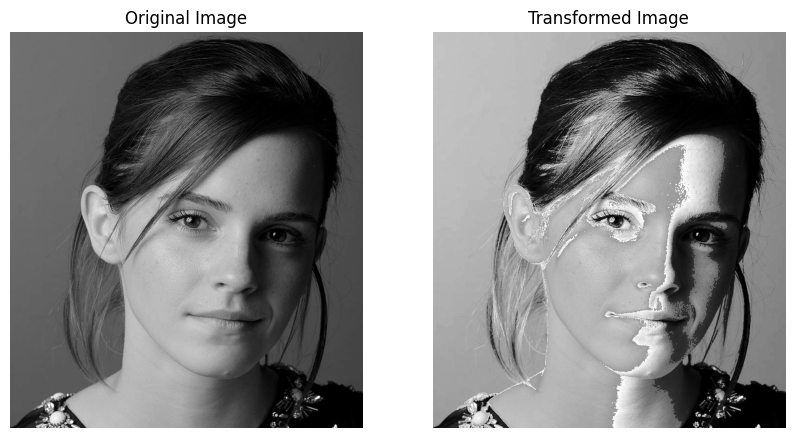

In [6]:
# Displaying the Original and Transformed Image
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img_org, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')
plt.show()


<h1>Question 2</h1>

In [7]:
# Visualizing the image
img_org = cv.imread('Images\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
if img_org is None: 
    assert False, 'Image could not be read'

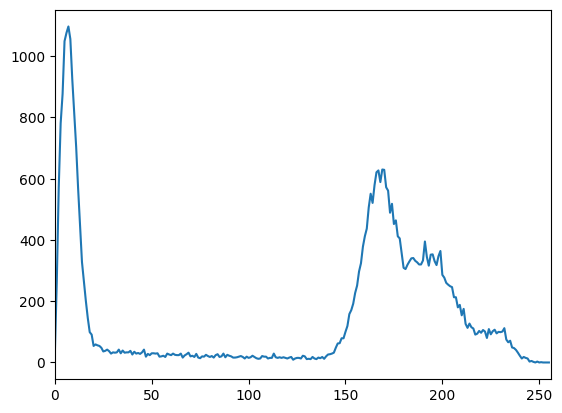

In [8]:
# Visualizing the Histogram
hist = cv.calcHist([img_org],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [9]:
# White Matter Accentuation
c = np.array([(50, 50), (170, 100)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0]-c[0, 0]).astype('uint8')
t3 = np.linspace(c[1 ,1], 255, 255-c[1, 0]).astype('uint8')
white_transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(white_transform))

256


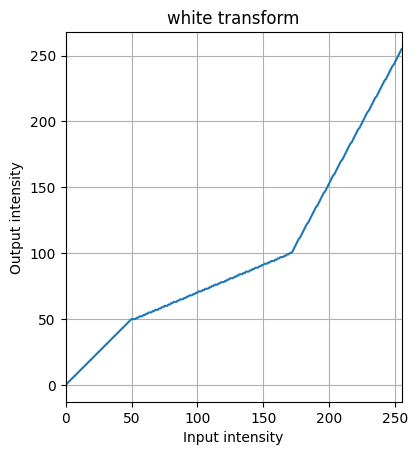

In [10]:
# Plotting the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(white_transform)
ax.set_title('white transform')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.grid
ax.set_aspect('equal')
ax.grid()
plt.show()

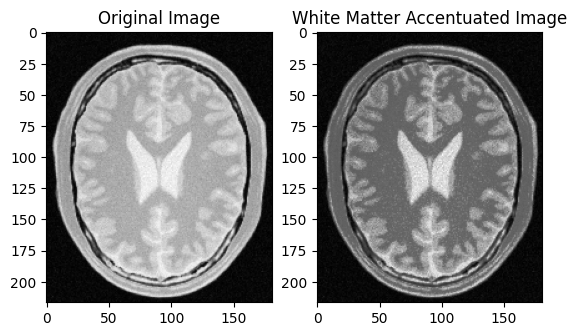

In [11]:
# Displaying the Original and Transformed Image
image_transformed_white = cv.LUT(img_org, white_transform)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(image_transformed_white, cmap="gray")
ax[1].set_title("White Matter Accentuated Image")

plt.show()

In [12]:
# Gray Matter Accentuation
c = np.array([(50, 25), (180, 255), (180, 90)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0]-c[0, 0]).astype('uint8')
t3 = np.linspace(c[2 ,1], 128, 255-c[2, 0]).astype('uint8')
gray_transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(gray_transform))

256


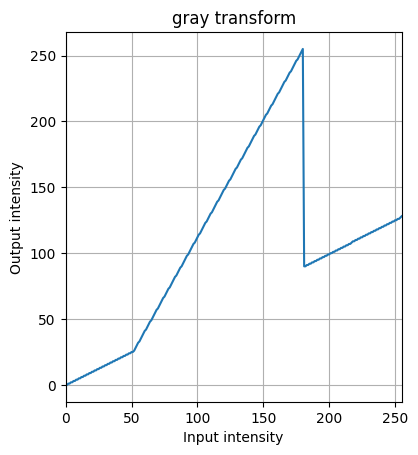

In [13]:
# Plotting the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(gray_transform)
ax.set_title('gray transform')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.grid
ax.set_aspect('equal')
ax.grid()
plt.show()

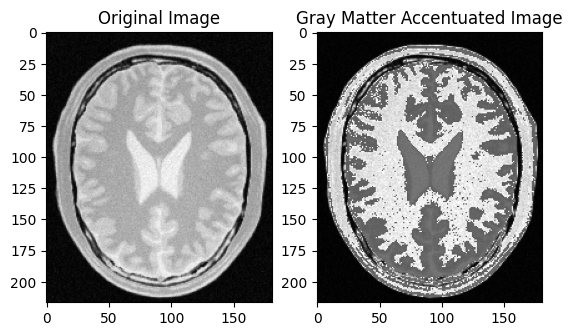

In [14]:
# Displaying the Original and Transformed Image
image_transformed_gray = cv.LUT(img_org, gray_transform)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(image_transformed_gray, cmap="gray")
ax[1].set_title("Gray Matter Accentuated Image")

plt.show()

<h1>Question 3</h1>

In [15]:
# Loading the image
img_org = cv.imread('Images\highlights_and_shadows.jpg')
if img_org is None: 
    assert False, 'Image could not be read'

In [16]:
# Converting the Image to L*a*b* Color Space
img_lab = cv.cvtColor(img_org, cv.COLOR_BGR2LAB)
# Extracting the L* Channel
img_l = img_lab[:,:,0]
# Gamma Value
gamma = 0.5
# Applying Gamma Correction to the L* Channel
img_corrected = np.power(img_l/ 255.0, gamma) * 255.0
# Puting the Processed L* Channel Back into the Image
img_lab[:,:,0] = img_corrected.astype('uint8')
# Converting the Image Back to RGB
img_gamma_corrected = cv.cvtColor(img_lab, cv.COLOR_LAB2RGB)

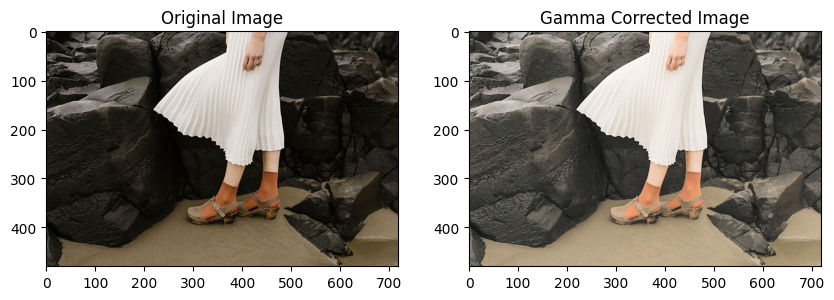

In [17]:
# Displaying the Original and Gamma Corrected Image
fig,ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(img_gamma_corrected)
ax[1].set_title("Gamma Corrected Image")

plt.show()

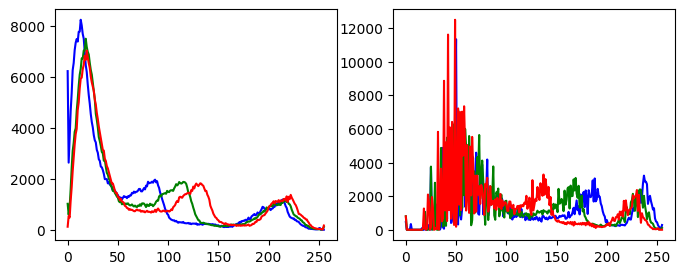

In [18]:
# # Histogram of Original Image and Gamma Corrected Imag
color = ('b', 'g', 'r')
fig, ax = plt.subplots(1,2, figsize=(8,3))
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_org], [i], None, [256], [0,256])
    ax[0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma_corrected], [i], None, [256], [0,256])
    ax[1].plot(hist_gamma, color = c)

<h1>Question 4</h1>

In [21]:
# Loading the Image
img_org = cv.imread('Images\spider.png')
if img_org is None:
    assert False, 'Image could not be read'

In [22]:
# Converting the Image to HSV Color Space
img_hsv = cv.cvtColor(img_org, cv.COLOR_BGR2HSV)
# Splitting the Image into hue, saturation and value planes
h, s, v = cv.split(img_hsv)

In [23]:
# Defining the Intensity Transformation Function
def intensity_transform(x, a, sigma):
    return min(x+a*128*np.exp((x-128)**2/(-2*sigma**2)), 255)
a = 0.6 # 0 <= a <= 1
sigma = 70
# Applying the Intensity Transformation to the Saturation Plane
s_transformed = np.zeros(s.shape, dtype='uint8')
for i in range(s.shape[0]):
    for j in range(s.shape[1]):
        s_transformed[i,j] = intensity_transform(s[i,j], a, sigma)


Value of a for a visually pleasing output is 0.6

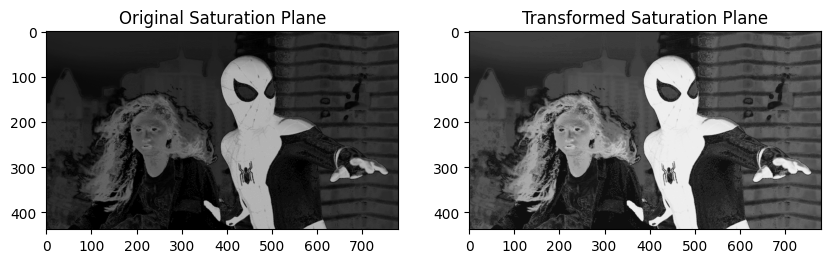

In [24]:
# Displaying the Original and Transformed Saturation Plane
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(s, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Saturation Plane")
ax[1].imshow(s_transformed, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Transformed Saturation Plane")
plt.show()

In [25]:
# Reconstructing the Image
img_hsv_transformed = cv.merge((h, s_transformed, v))

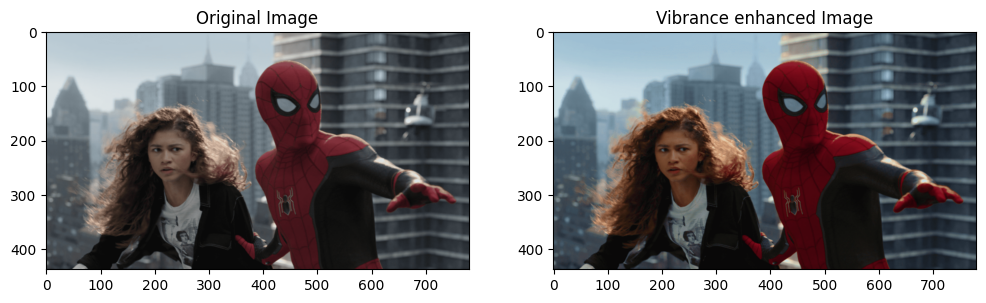

In [26]:
vibrance_enhanced_img = cv.cvtColor(img_hsv_transformed, cv.COLOR_HSV2RGB)
# Displaying the Original, Vibrance enhanced Image
fig,ax = plt.subplots(1,2, figsize=(12,10))
ax[0].imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(vibrance_enhanced_img)
ax[1].set_title("Vibrance enhanced Image")  
plt.show()

<h1>Question 5</h1>

In [28]:
# Loading the Image
img_org = cv.imread('Images\shells.tif', cv.IMREAD_GRAYSCALE)
if img_org is None: 
    assert False, 'Image could not be read'

In [29]:
# Creating the Histogram of the Original Image
hist, bins = np.histogram(img_org.ravel(), 256, [0, 256])
cdf =  hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

In [30]:
# Probabilities for each intensity level
prob = hist / np.sum(hist)

In [31]:
# Cumulative sum of pixels
cum_sum=np.zeros(256)
for i in range(len(cum_sum)):
    cum_sum[i] = np.sum(hist[:i+1])

In [32]:
# Equalised cumulative sum of pixels
equ_cum_sum = np.zeros(256)
for x in range(len(equ_cum_sum)):
    equ_cum_sum[x] = (cum_sum[x] * 255) / img_org.size
equ_cum_sum = equ_cum_sum.astype('uint8')

In [33]:
# Equalised Image
img_equ = np.zeros(img_org.shape)
for i in range(len(img_org)):
    for j in range(len(img_org[i])):
        img_equ[i][j] = equ_cum_sum[img_org[i][j]]

img_equ = img_equ.astype('uint8')

In [34]:
from tabulate import tabulate

# Example arrays
array1 = np.arange(256)
array2 = hist
array3 = prob
array4 = cum_sum
array5 = equ_cum_sum

# Combine arrays into a list of tuples
combined_data = list(zip(array1, array2, array3, array4, array5))

# Define headers for the columns
headers = ['r_k', 'n_k', 'Pr(r_k)','Cumulative n_k','rounded']

# Print the combined data using tabulate
table = tabulate(combined_data, headers=headers, tablefmt='grid')
print(table)

+-------+-------+-----------+------------------+-----------+
|   r_k |   n_k |   Pr(r_k) |   Cumulative n_k |   rounded |
+=======+=======+===========+==================+===========+
|     0 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     1 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     2 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     3 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     4 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     5 |     0 |  0        |                0 |         0 |
+-------+-------+-----------+------------------+-----------+
|     6 |     0 |  0        |                0 |         0 |
+-------+-------+-------

In [35]:
# Creating the Histogram of the Equalised Image
hist,bins = np.histogram(img_equ.ravel(),256,[0,256])
cdf_equ = hist.cumsum()
cdf_equ_normalized = cdf_equ * hist.max()/ cdf_equ.max()

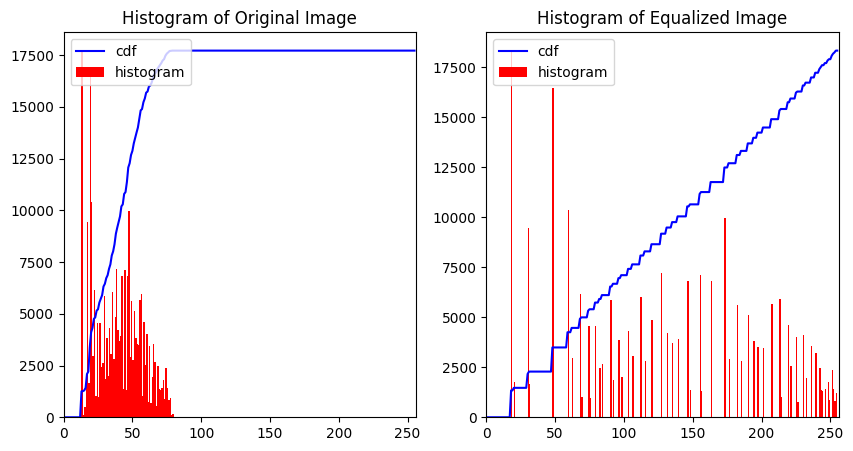

In [36]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdf_normalized, color = 'b')
ax[0].hist(img_org.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdf_equ_normalized, color = 'b')
ax[1].hist(img_equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

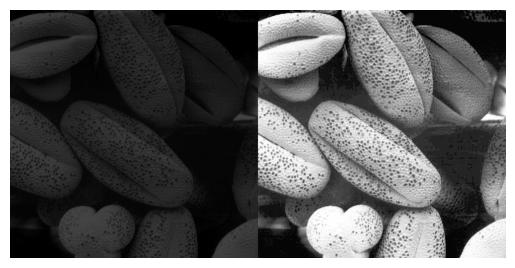

In [37]:
# Displaying the Original and Equalized Image
res = np.hstack((img_org, img_equ))
plt.axis('off')
plt.imshow(res, cmap='gray')

__Optional Method using Builtin function__ 

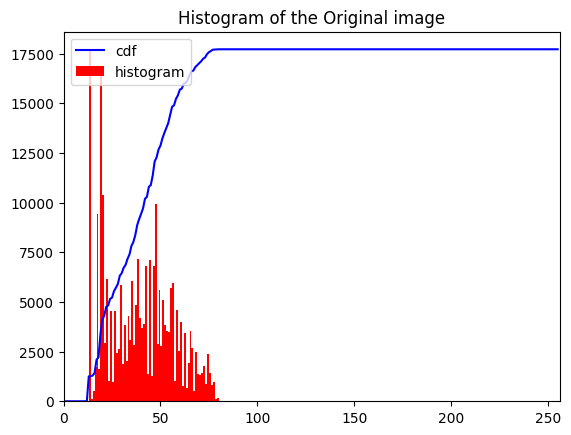

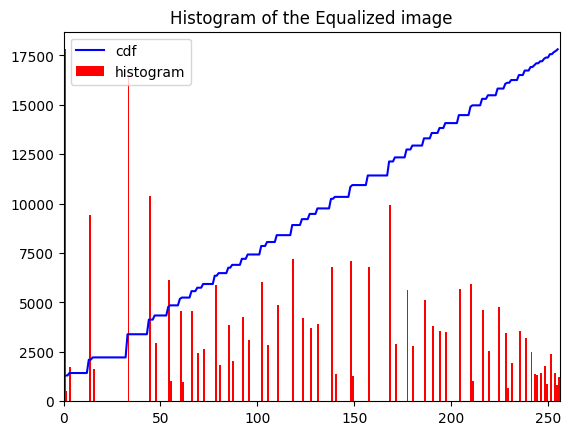

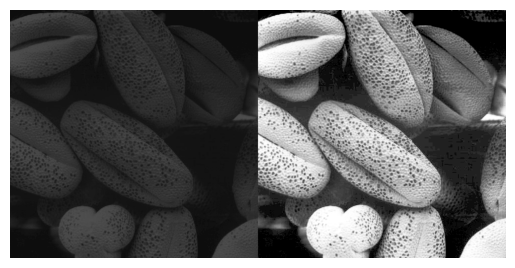

In [38]:
# Plotting the Histogram of the Original Image
hist, bins = np.histogram(img_org.ravel(), 256, [0, 256])
cdf =  hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color = 'b')
# Plotting the Histogram of the Original Image
plt.hist(img_org.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Original image')
plt.show()

# Applying Histogram Equalization
img_equ = cv.equalizeHist(img_org)
hist, bins = np.histogram(img_equ.ravel(), 256, [0, 256])
cdf =  hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
# Plotting the Histogram of the Equalized Image
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_equ.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized image')
plt.show()

# Displaying the Original and Equalized Image
res = np.hstack((img_org, img_equ))
plt.axis('off')
plt.imshow(res, cmap='gray')

<h1>Question 6</h1>

In [40]:
# Loading the Image
img_org = cv.imread('Images\jeniffer.jpg', cv.IMREAD_ANYCOLOR)
if img_org is None: 
    assert False, 'Image could not be read'

In [41]:
# Converting the Image to HSV Color Space
img_hsv = cv.cvtColor(img_org, cv.COLOR_BGR2HSV)
# Splitting the Image into Hue, Saturation and Value Planes
h, s, v = cv.split(img_hsv)

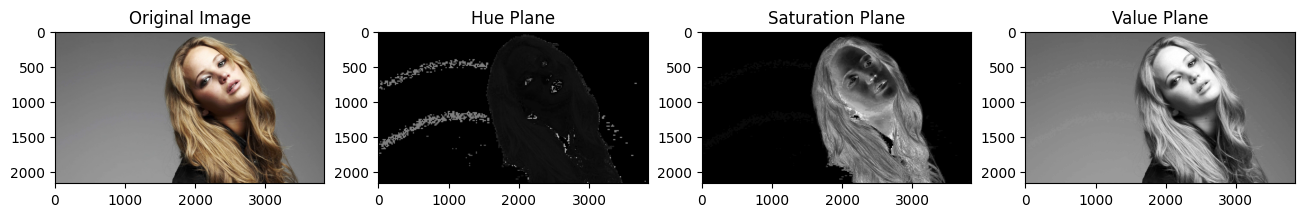

In [42]:
# Displaying the hue, saturation and value planes in grayscale
fig, ax = plt.subplots(1,4, figsize=(16,10))
ax[0].imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(h, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Hue Plane")
ax[2].imshow(s, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Saturation Plane")
ax[3].imshow(v, cmap="gray", vmin=0, vmax=255)
ax[3].set_title("Value Plane")
plt.show()

Text(0.5, 1.0, 'Foreground Mask')

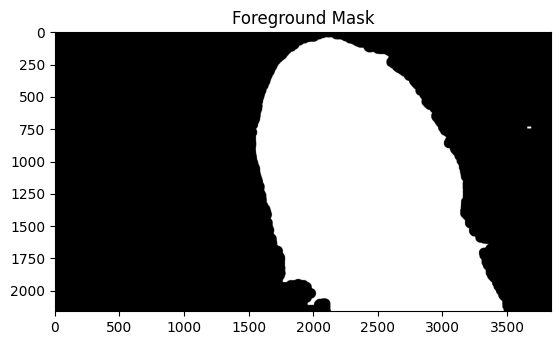

In [43]:
# Extracting Forground Mask
threshol_value = 12
foreground_mask = cv.threshold(s, threshol_value, 255, cv.THRESH_BINARY)[1]
foreground_mask = cv.morphologyEx(foreground_mask, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (80, 80)))
# Displaying the mask
fig, ax = plt.subplots()
ax.imshow(foreground_mask, cmap="gray")
ax.set_title("Foreground Mask")

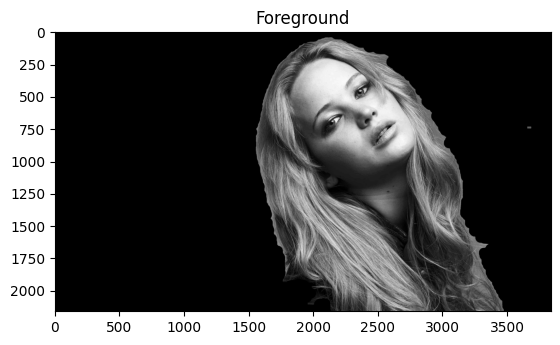

In [65]:
# Performing the masking operation using 'cv.bitwise_and' function
foreground = cv.bitwise_and(img_org, img_org, mask=foreground_mask)
# Convert the foreground to grayscale for histogram calculation
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
# Displayong the foreground
fig,ax=plt.subplots()
ax.imshow(foreground_gray, cmap="gray")
ax.set_title("Foreground")
plt.show()

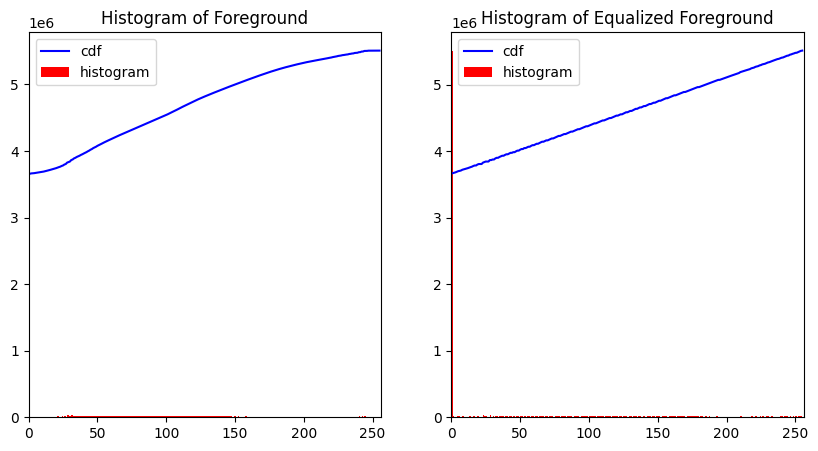

In [45]:
# Calculating the Histogram of the Foreground
hist_foreground, bins = np.histogram(foreground_gray.ravel(), 256, [0, 256])
cdf_foreground =  hist_foreground.cumsum()
cdf_foreground_normalized = cdf_foreground * hist_foreground.max() / cdf_foreground.max()
# Histogram Equalization
img_forground_equ = cv.equalizeHist(foreground_gray)
hist_foreground_equ, bins = np.histogram(img_forground_equ.ravel(), 256, [0, 256])
cdf_foreground_equ =  hist_foreground_equ.cumsum()
cdf_foreground_equ_normalized = cdf_foreground_equ * hist_foreground_equ.max() / cdf_foreground_equ.max()
# Displaying the Histograms
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(cdf_foreground_normalized, color = 'b')
ax[0].hist(foreground_gray.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Foreground")
ax[1].plot(cdf_foreground_equ_normalized, color = 'b')
ax[1].hist(img_forground_equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Foreground")
plt.show()


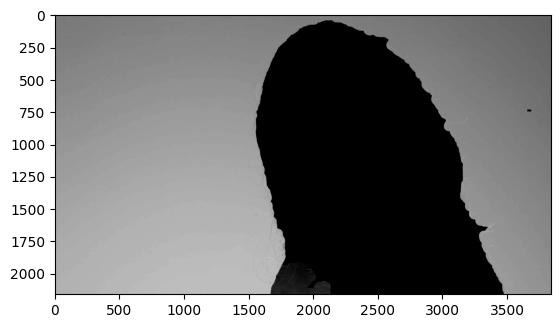

In [46]:
# Extracting the Background
background_mask = cv.bitwise_not(foreground_mask)
img_background = cv.bitwise_and(img_org, img_org, mask=background_mask)
img_background_gray = cv.cvtColor(img_background, cv.COLOR_BGR2GRAY)
# Displaying the Background
fig, ax = plt.subplots()
ax.imshow(img_background_gray, cmap="gray")
plt.show()

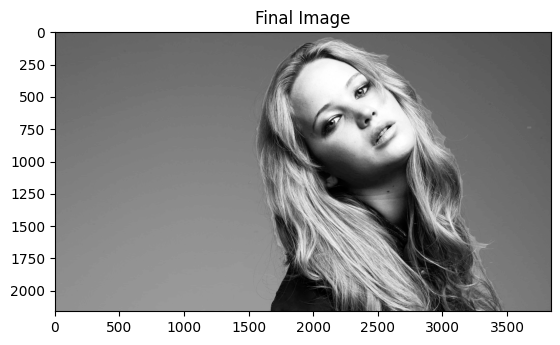

In [66]:
# Adding the Background with Equalized Foreground
img_final = cv.add(img_background_gray, img_forground_equ)
# Displaying the Final Image
fig, ax=plt.subplots()
ax.imshow(img_final, cmap="gray")
ax.set_title("Final Image")
plt.show()

<h1>Question 7</h1>

In [48]:
# Loading the Image
img_org7 = cv.imread('Images\einstein.png', cv.IMREAD_GRAYSCALE)
if img_org7 is None: 
    assert False, 'Image could not be read'

In [49]:
# Creating a sobel vertical kernel
kernel_v = np.array([[1, 2, 1], [0, 0, 0], [-1, -2 , -1]])
# Creating a sobel horizontal kernel
kernel_h = np.array([[1, 0, -1], [2, 0, -2], [1, 0 , -1]])
img_filter_v = cv.filter2D(img_org7, -1, kernel_v)
img_filter_h = cv.filter2D(img_org7, -1, kernel_h)

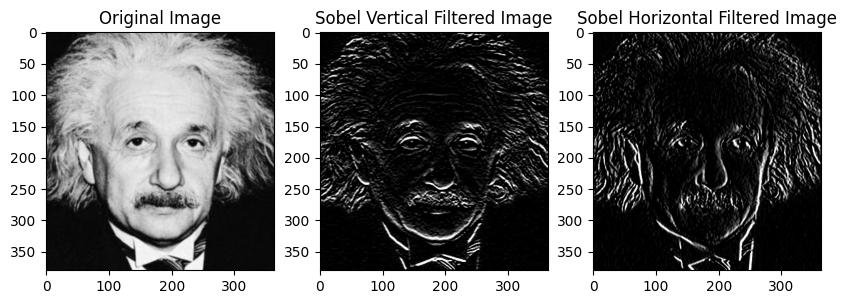

In [50]:
# Displaying the Original and Filtered Images
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(img_org7, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(img_filter_v, cmap="gray")
ax[1].set_title("Sobel Vertical Filtered Image")
ax[2].imshow(img_filter_h, cmap="gray")
ax[2].set_title("Sobel Horizontal Filtered Image")
plt.show()

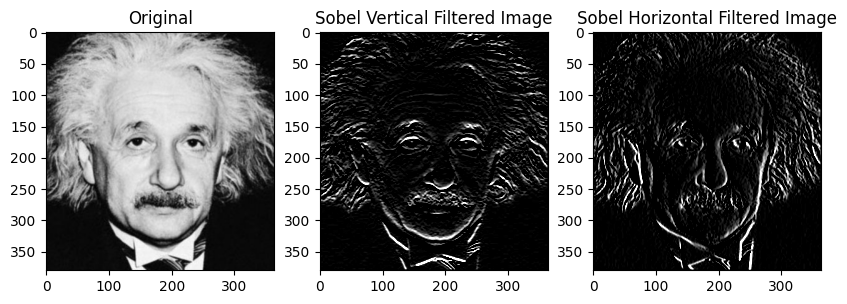

In [51]:
# Sobel Filter using Custom Function
def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = kernel.shape[0] // 2, kernel.shape[1] // 2
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros((h, w), dtype='float')

    for m in range(k_hh, h -k_hh):
          for n in range(k_hw, w - k_hw):
                result[m, n] = np.dot(image_float[m - k_hh:m + k_hh + 1, n - k_hw:n + k_hw + 1].flatten(), kernel.flatten())
    result = result * 255   # Undo normalization
    # result = np.minimum(255, np.maximum(0, result)).astype(np.uint8) # Limit between 0 and 255
    return result
    

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(img_org7, cmap='gray')
ax[0].set_title('Original')
imgb = filter(img_org7, kernel_v)
ax[1].imshow(imgb, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sobel Vertical Filtered Image')
imgc = filter(img_org7, kernel_h)
ax[2].imshow(imgc, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Sobel Horizontal Filtered Image')
plt.show()

In [52]:
kernel_1 = np.array([[1], [2], [1]])
kernel_2 = np.array([[1, 0, -1]])
kernel = np.dot(kernel_1, kernel_2)
img_conv = cv.filter2D(img_org7, -1, kernel)

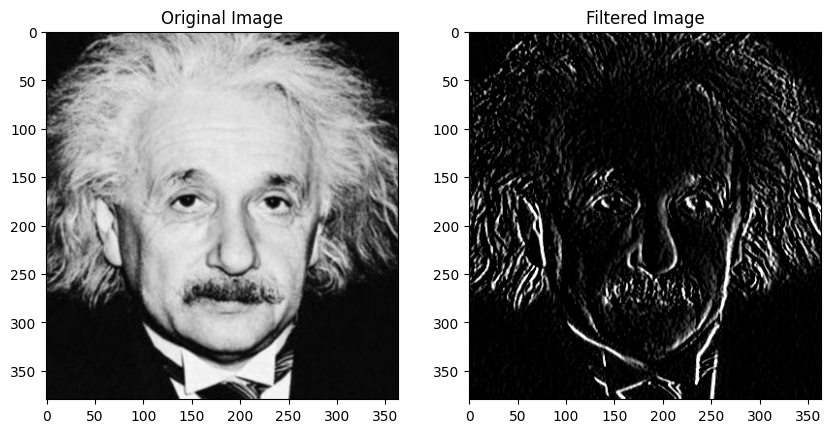

In [53]:
# Displaying the Original and Filtered Image
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_org7, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(img_conv, cmap="gray")
ax[1].set_title("Filtered Image")
plt.show()

<h1>Question 8</h1>

In [54]:
img_org8 = cv.imread('Images/zooming/im01small.png')
if img_org8 is None: 
    assert False, 'Image could not be read'

In [55]:
# Nearest Neighbour Function
def zoom_nearest_neighbor(image, scale_factor):
    height, width = image.shape[:2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            orig_i = int(i / scale_factor)
            orig_j = int(j / scale_factor)
            zoomed_image[i, j] = image[orig_i, orig_j]

    return zoomed_image
# Bilinear Interpolation Function
def zoom_bilinear_interpolation(image, scale_factor):
    height, width = image.shape[:2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            orig_i = i / scale_factor
            orig_j = j / scale_factor
            x1, y1 = int(orig_j), int(orig_i)
            x2, y2 = min(x1 + 1, width - 1), min(y1 + 1, height - 1)
            dx, dy = orig_j - x1, orig_i - y1

            # Bilinear interpolation
            interpolated_pixel = (
                (1 - dx) * (1 - dy) * image[y1, x1] +
                dx * (1 - dy) * image[y1, x2] +
                (1 - dx) * dy * image[y2, x1] +
                dx * dy * image[y2, x2]
            )
            zoomed_image[i, j] = interpolated_pixel.astype(np.uint8)

    return zoomed_image

In [56]:
# Zoom factor
zoom_factor = 4  # 0 - 10
# Zoom using nearest-neighbor
img_zomm_nn = zoom_nearest_neighbor(img_org8, zoom_factor)
# Zoom using bilinear interpolation
img_zoom_bi = zoom_bilinear_interpolation(img_org8, zoom_factor)

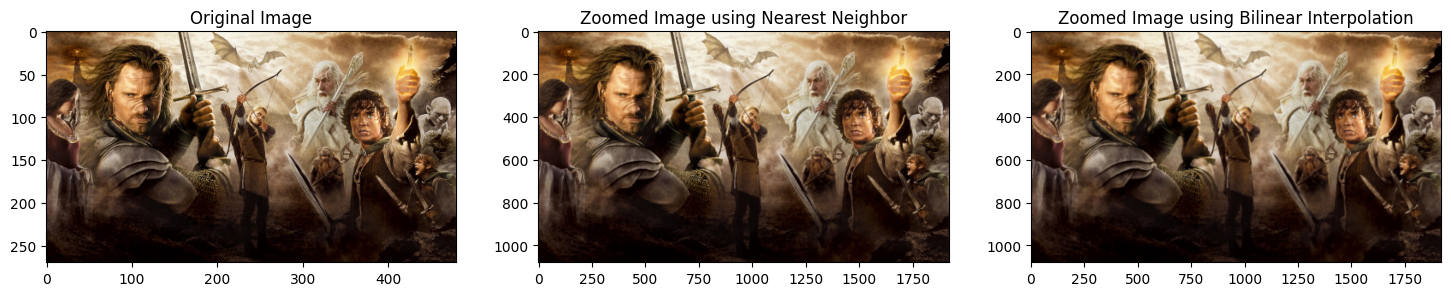

In [57]:
# Displaying the results
fig, ax = plt.subplots(1,3, figsize=(18,18))
ax[0].imshow(cv.cvtColor(img_org8, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(img_zomm_nn, cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image using Nearest Neighbor")
ax[2].imshow(cv.cvtColor(img_zoom_bi, cv.COLOR_BGR2RGB))
ax[2].set_title("Zoomed Image using Bilinear Interpolation")
plt.show()


In [58]:
original_img = cv.imread('Images/zooming/im01.png')
if original_img is None: 
    assert False, 'Image could not be read'

In [59]:
ssd_nn = np.sum((img_zomm_nn - original_img)**2)
ssd_bi = np.sum((img_zoom_bi - original_img)**2)

# Normalizing the SSD values
normalized_ssd_nn = ssd_nn / original_img.size
normalized_ssd_bi = ssd_bi / original_img.size

print(f"Normalized SSD (Nearest Neighbor): {normalized_ssd_nn}")
print(f"Normalized SSD (Bilinear Interpolation): {normalized_ssd_bi}")

Normalized SSD (Nearest Neighbor): 31.284316486625514
Normalized SSD (Bilinear Interpolation): 39.257033179012346


<h1>Question 9</h1>

In [60]:
img_org9 = cv.imread('Images/flower.png')
if img_org9 is None:
    assert False, 'Image could not be read'

In [61]:
# Initializing a Mask
mask = np.zeros(img_org9.shape[:2], dtype=np.uint8)
# Creating a Rectangles to Define the Foreground and Background
rectangles = (20, 50, img_org9.shape[1] - 20, img_org9.shape[0] - 150)
# Applying a grapCut algorithm
cv.grabCut(img_org9, mask, rectangles, None, None, 5, cv.GC_INIT_WITH_RECT)
# Creating a mask to extract the foreground and background 
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
mask3 = 1 - mask2
# Multiplying the mask with the input image to extract foreground
img_forground = img_org9 * mask2[:,:,np.newaxis]
# Background Image
img_background = img_org9 - img_forground


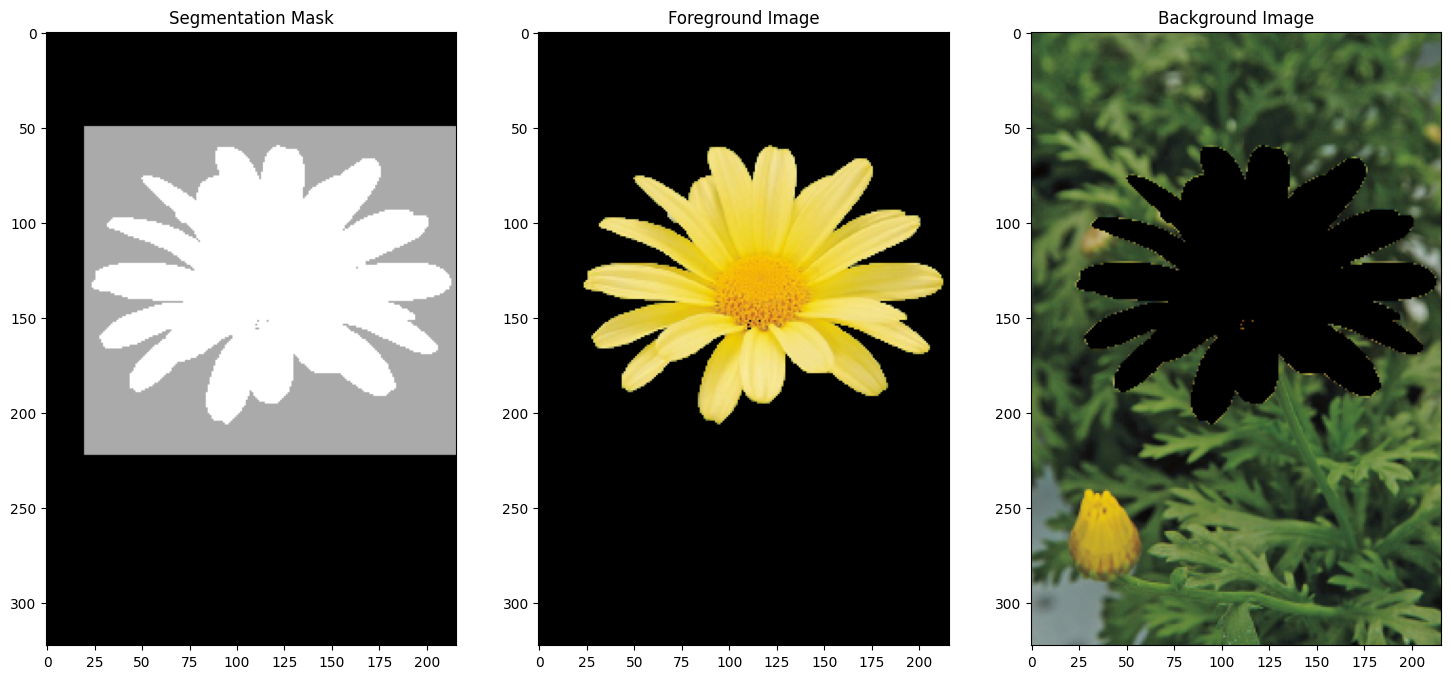

In [62]:
# Displaying the Segmentation Mask, Foreground and Background Images
fig, ax = plt.subplots(1,3, figsize=(18,18))
ax[0].imshow(mask, cmap="gray")
ax[0].set_title("Segmentation Mask")
ax[1].imshow(cv.cvtColor(img_forground, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[2].imshow(cv.cvtColor(img_background, cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
plt.show()

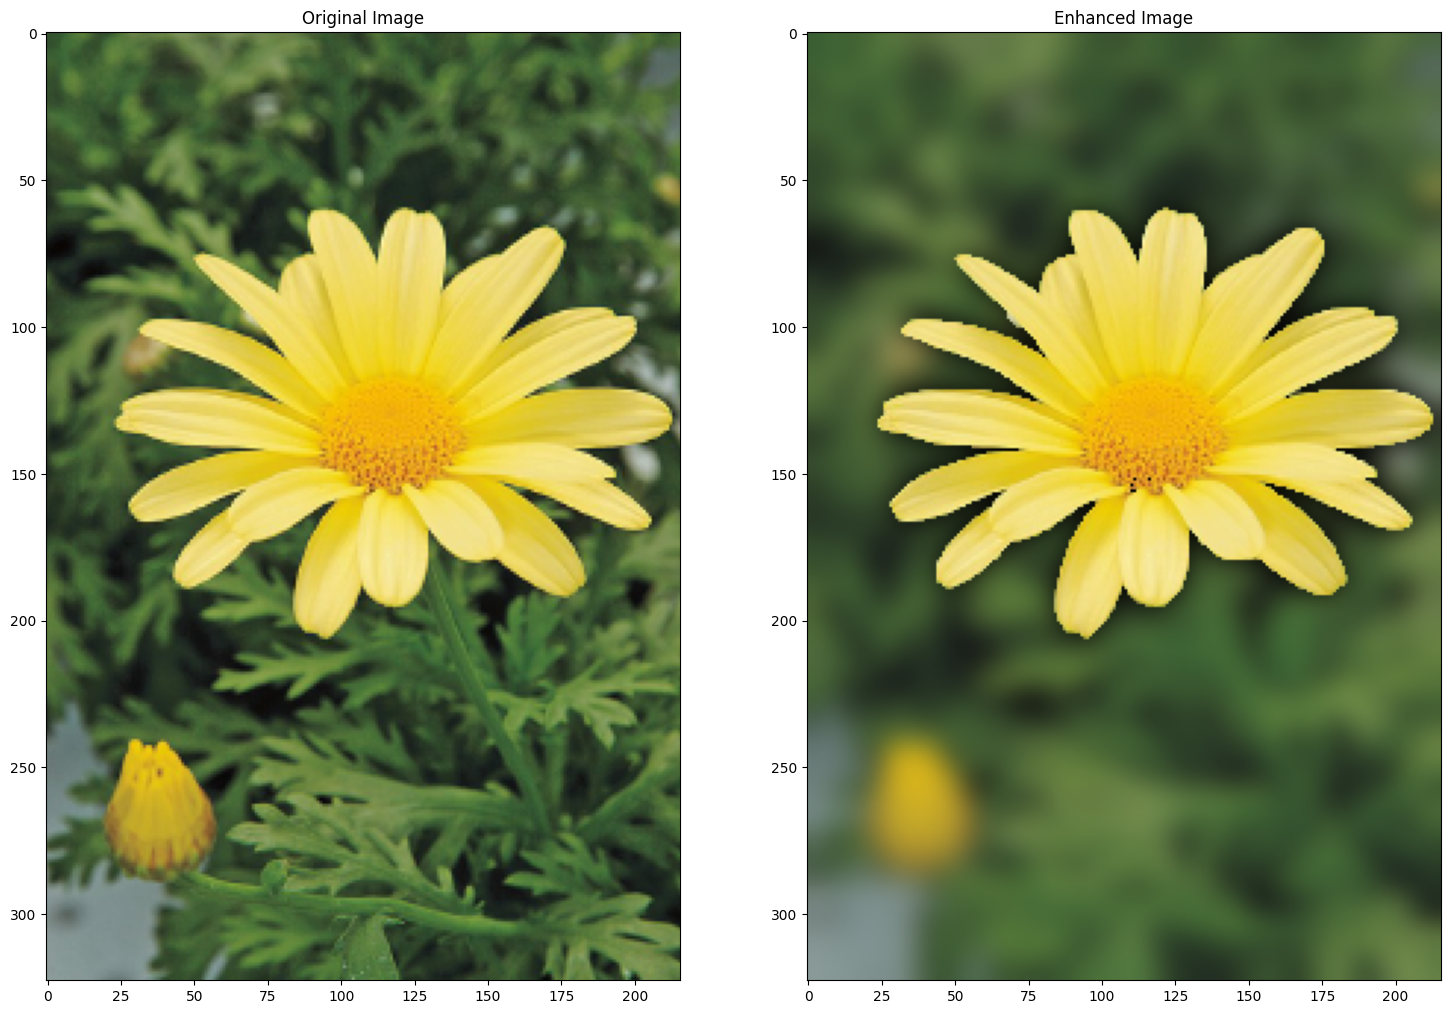

In [63]:
# Applying Gaussian Blur to the Background Image
img_background_blur = cv.GaussianBlur(img_background, (51, 51), 5)
img_background_blur = img_background_blur * mask3[:,:,np.newaxis]  
# Combining the Foreground and Blurred Background Images
img_enhanced = img_background_blur + img_forground
# Displaying the Enhanced Image
fig, ax = plt.subplots(1, 2, figsize=(18, 18))
ax[0].imshow(cv.cvtColor(img_org9, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(img_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
plt.show()